# Surface scratch

- Test the concordance between vertex positions on L and R hemis

In [2]:
# Set the environment
import os
import glob
import numpy as np
import nibabel as nib
import seaborn as sns
from brainspace.plotting import plot_hemispheres
from brainspace.mesh.mesh_io import read_surface
from brainspace.datasets import load_conte69

# Set the working directory to the 'out' directory
out='/data_/mica3/BIDS_MICs/derivatives' # <<<<<<<<<<<< CHANGE THIS PATH
os.chdir(out)

# This variable will be different for each subject
sub='sub-HC159'
ses='ses-01'
subjectID=f'{sub}_{ses}'           # <<<<<<<<<<<< CHANGE THIS SUBJECT's ID
subjectDir=f'micapipe_v0.2.0/{sub}/{ses}' # <<<<<<<<<<<< CHANGE THIS SUBJECT's DIRECTORY

# Set paths and variables
dir_FS = 'freesurfer/' + subjectID
dir_surf = subjectDir + '/surf/'
dir_maps = subjectDir + '/maps/'

# Path to MICAPIPE
micapipe=os.popen("echo $MICAPIPE").read()[:-1]

In [4]:
micapipe

'/data_/mica1/01_programs/micapipe-v0.2.0'

In [3]:
# Load native pial surface
pial_lh = read_surface(dir_FS+'/surf/lh.pial', itype='fs')
pial_rh = read_surface(dir_FS+'/surf/rh.pial', itype='fs')

# Load native white matter surface
wm_lh = read_surface(dir_FS+'/surf/lh.white', itype='fs')
wm_rh = read_surface(dir_FS+'/surf/rh.white', itype='fs')

# Load native inflated surface
inf_lh = read_surface(dir_FS+'/surf/lh.inflated', itype='fs')
inf_rh = read_surface(dir_FS+'/surf/rh.inflated', itype='fs')

# Load fsaverage5
fs5_lh = read_surface('freesurfer/fsaverage5/surf/lh.pial', itype='fs')
fs5_rh = read_surface('freesurfer/fsaverage5/surf/rh.pial', itype='fs')

# Load fsaverage5 inflated
fs5_inf_lh = read_surface('freesurfer/fsaverage5/surf/lh.inflated', itype='fs')
fs5_inf_rh = read_surface('freesurfer/fsaverage5/surf/rh.inflated', itype='fs')

# Load fsLR 32k
f32k_lh = read_surface(micapipe + '/surfaces/fsLR-32k.L.surf.gii', itype='gii')
f32k_rh = read_surface(micapipe + '/surfaces/fsLR-32k.R.surf.gii', itype='gii')

# Load fsLR 32k inflated
f32k_inf_lh = read_surface(micapipe + '/surfaces/fsLR-32k.L.inflated.surf.gii', itype='gii')
f32k_inf_rh = read_surface(micapipe + '/surfaces/fsLR-32k.R.inflated.surf.gii', itype='gii')

# Load Load fsLR 5k
f5k_lh = read_surface(micapipe + '/surfaces/fsLR-5k.L.surf.gii', itype='gii')
f5k_rh = read_surface(micapipe + '/surfaces/fsLR-5k.R.surf.gii', itype='gii')

# Load fsLR 5k inflated
f5k_inf_lh = read_surface(micapipe + '/surfaces/fsLR-5k.L.inflated.surf.gii', itype='gii')
f5k_inf_rh = read_surface(micapipe + '/surfaces/fsLR-5k.R.inflated.surf.gii', itype='gii')

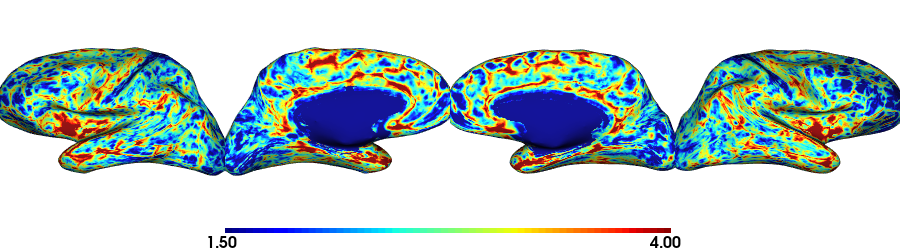

In [6]:
# thickness on inflated native surface
# Load data
th_lh = dir_maps + subjectID + '_hemi-L_surf-fsnative_label-thickness.func.gii'
th_rh = dir_maps + subjectID + '_hemi-R_surf-fsnative_label-thickness.func.gii'
th_nat = np.hstack(np.concatenate((nib.load(th_lh).darrays[0].data,
                                   nib.load(th_rh).darrays[0].data), axis=0))

# Plot the surface
plot_hemispheres(inf_lh, inf_rh, array_name=th_nat, size=(900, 250), color_bar='bottom', zoom=1.25, embed_nb=True, interactive=False, share='both',
                 nan_color=(0, 0, 0, 1), color_range=(1.5, 4), cmap="jet", transparent_bg=False)

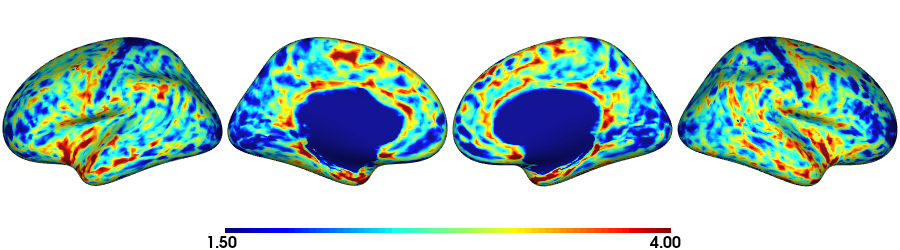

In [8]:
# thickness fsavg5
# Load data
th_lh_fs5 = dir_maps + subjectID + '_hemi-L_surf-fsaverage5_label-thickness.func.gii'
th_rh_fs5 = dir_maps + subjectID + '_hemi-R_surf-fsaverage5_label-thickness.func.gii'
th_fs5 = np.hstack(np.concatenate((nib.load(th_lh_fs5).darrays[0].data,
                                   nib.load(th_rh_fs5).darrays[0].data), axis=0))

# Plot the surface
plot_hemispheres(fs5_inf_lh, fs5_inf_rh, array_name=th_fs5, size=(900, 250), color_bar='bottom', zoom=1.25, embed_nb=True, interactive=False, share='both',
                         nan_color=(0, 0, 0, 1), color_range=(1.5, 4), cmap="jet", transparent_bg=False)

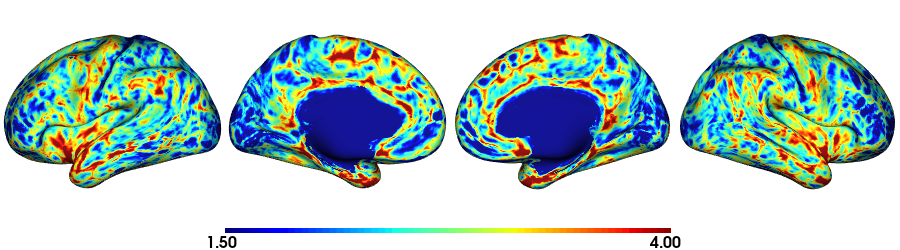

In [12]:
# Load the data
th_lh_fsLR32k = dir_maps + subjectID + '_hemi-L_surf-fsLR-32k_label-thickness.func.gii'
th_rh_fsLR32k = dir_maps + subjectID + '_hemi-R_surf-fsLR-32k_label-thickness.func.gii'
th_fsLR32k = np.hstack(np.concatenate((nib.load(th_lh_fsLR32k).darrays[0].data,
                                       nib.load(th_rh_fsLR32k).darrays[0].data), axis=0))

# Plot the surface
plot_hemispheres(f32k_inf_lh, f32k_inf_rh, array_name=th_fsLR32k, size=(900, 250), color_bar='bottom', zoom=1.25, embed_nb=True, interactive=False, share='both',
                         nan_color=(0, 0, 0, 1), color_range=(1.5, 4), cmap="jet", transparent_bg=False)

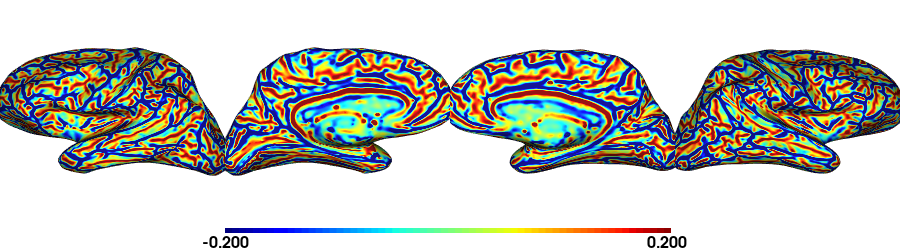

In [ ]:
# NATIVE INFLATED

cv_lh = dir_maps + subjectID + '_hemi-L_surf-fsnative_label-curv.func.gii'
cv_rh = dir_maps + subjectID + '_hemi-R_surf-fsnative_label-curv.func.gii'
cv = np.hstack(np.concatenate((nib.load(cv_lh).darrays[0].data,
                               nib.load(cv_rh).darrays[0].data), axis=0))

plot_hemispheres(inf_lh, inf_rh, array_name=cv, size=(900, 250), color_bar='bottom', zoom=1.25, embed_nb=True, interactive=False, share='both',
                         nan_color=(0, 0, 0, 1), color_range=(-0.2, 0.2), cmap='RdYlGn', transparent_bg=False)

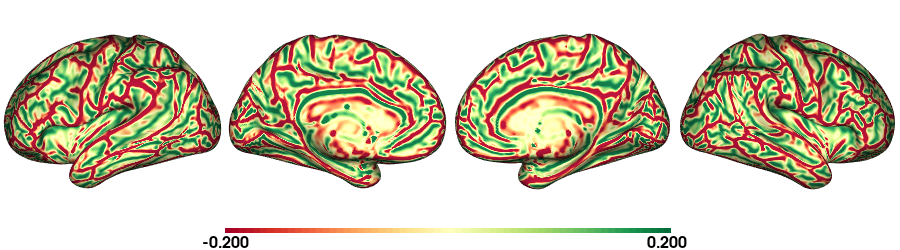

In [15]:
# fsLR-32k
cv_lh_fsLR32k = dir_maps + subjectID + '_hemi-L_surf-fsLR-32k_label-curv.func.gii'
cv_rh_fsLR32k = dir_maps + subjectID + '_hemi-R_surf-fsLR-32k_label-curv.func.gii'
cv_fsLR32k = np.hstack(np.concatenate((nib.load(cv_lh_fsLR32k).darrays[0].data,
                                       nib.load(cv_rh_fsLR32k).darrays[0].data), axis=0))
# Plot the surface
plot_hemispheres(f32k_inf_lh, f32k_inf_rh, array_name=cv_fsLR32k, size=(900, 250), color_bar='bottom', zoom=1.25, embed_nb=True, interactive=False, share='both',
                         nan_color=(0, 0, 0, 1), color_range=(-0.2, 0.2), cmap='RdYlGn', transparent_bg=False)